# Problem Statement 

The dataset contains details about used cars available on CarDekho, a popular car marketplace. The goal is to analyze and derive insights about car pricing, mileage, and ownership trends, and predict the resale value of a car based on various attributes.

# Column Description

name:- The make and model of the car (e.g., Maruti 800 AC).
                                     
year:- The year in which the car was manufactured.

selling_price:- The price at which the car is being sold (in INR).

km_driven:- The total kilometers the car has been driven.

fuel:- The type of fuel used by the car (e.g., Petrol, Diesel).

seller_type:- Indicates whether the seller is an individual or a dealer.

transmission:- The type of transmission in the car (e.g., Manual, Automatic).

owner:- The ownership status of the car (e.g., First Owner, Second Owner).

In [106]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import squarify
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv("D:\Data_Set\CAR DETAILS FROM CAR DEKHO.csv",encoding = 'unicode_escape')
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


Here is the row count and type of each column

In [4]:
df.shape

(4340, 8)

This code gives us the column and row information of the dataset.

In [5]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

This code gives us the names of the columns.

In [21]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


This code shows us some values ​​of numerical values ​​such as mean, standard deviation, minimum, maximum.

In [7]:
df.isna().sum() # for missing value

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

This code gives us the number of null values ​​in the dataset.

# Finding outliers

In [16]:
car=df.select_dtypes(exclude='object')
car

,year,selling_price,km_driven
0,2007,60000,70000
1,2007,135000,50000
2,2012,600000,100000
3,2017,250000,46000
4,2014,450000,141000
...,...,...,...
4335,2014,409999,80000
4336,2014,409999,80000
4337,2009,110000,83000
4338,2016,865000,90000


<Axes: xlabel='year'>

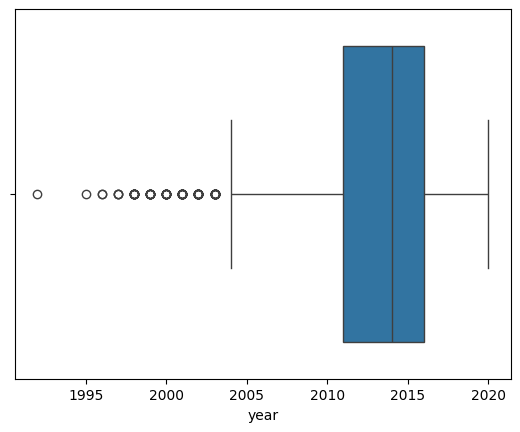

In [17]:
sns.boxplot(x='year',data=df)

<Axes: xlabel='selling_price'>

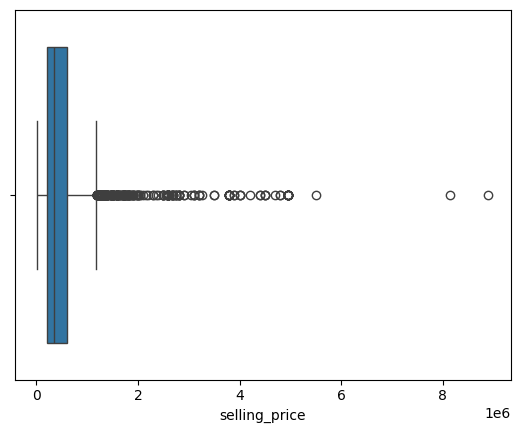

In [18]:
sns.boxplot(x='selling_price',data=df)

<Axes: xlabel='km_driven'>

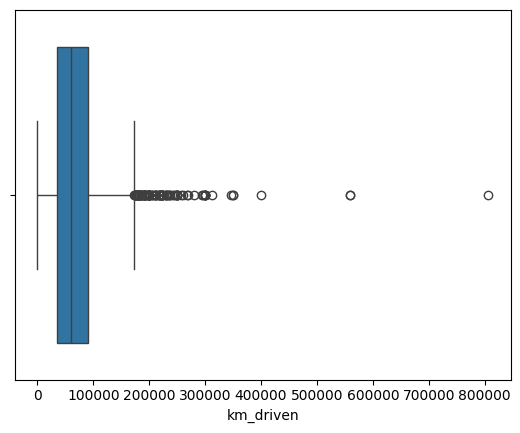

In [19]:
sns.boxplot(x='km_driven',data=df)

# Removing Outliers 

In [25]:
df=df[df['year'] < df['year'].quantile(0.99)]
df=df[df['selling_price'] < df['selling_price'].quantile(0.99)]
df=df[df['km_driven'] < df['km_driven'].quantile(0.99)]

<Axes: xlabel='year'>

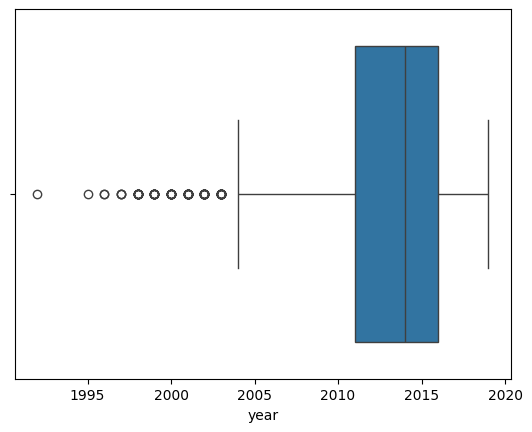

In [26]:
sns.boxplot(x='year',data=df)

<Axes: xlabel='selling_price'>

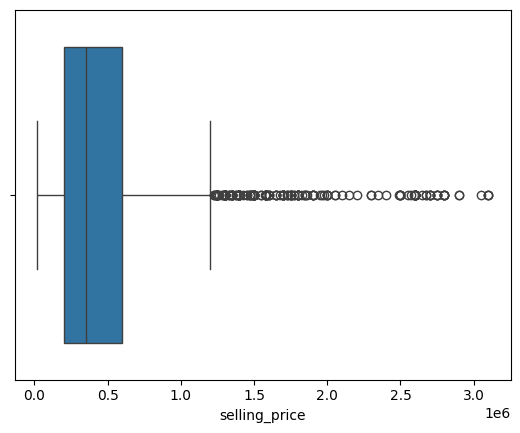

In [24]:
sns.boxplot(x='selling_price',data=df)

<Axes: xlabel='km_driven'>

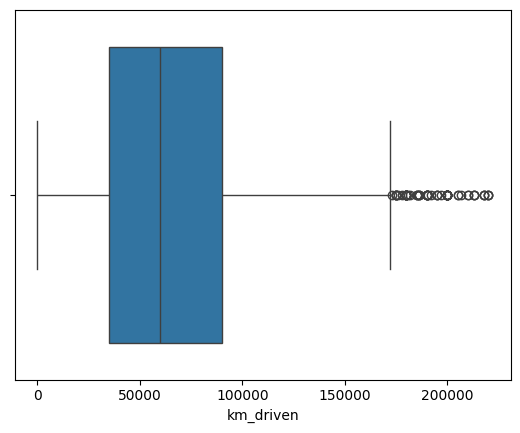

In [27]:
sns.boxplot(x='km_driven',data=df)

In [29]:
df.shape

(4162, 8)

In [33]:
df['owner'].value_counts()

owner
First Owner             2695
Second Owner            1089
Third Owner              295
Fourth & Above Owner      78
Test Drive Car             5
Name: count, dtype: int64

In [34]:
df['owner'].min(),df['owner'].max()

('First Owner', 'Third Owner')

# Exploratory Data Analysis (EDA)

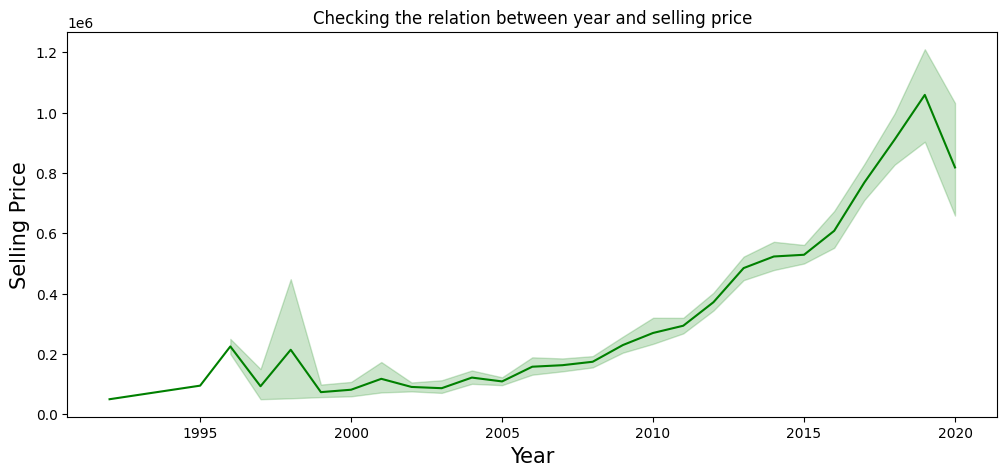

In [85]:
plt.figure(figsize=(12,5))
sns.lineplot(x='year',y='selling_price',data=df,color='green')
plt.title("Checking the relation between year and selling price")
plt.xlabel('Year', fontsize=15)
plt.ylabel('Selling Price', fontsize=15)
plt.show()

Observation :- 

The line plot shows the relationship between the year and selling price of vehicles.It suggests a trend where the selling price tends to vary with the year, 
possibly showing either an increase or decrease over time depending on the dataset.

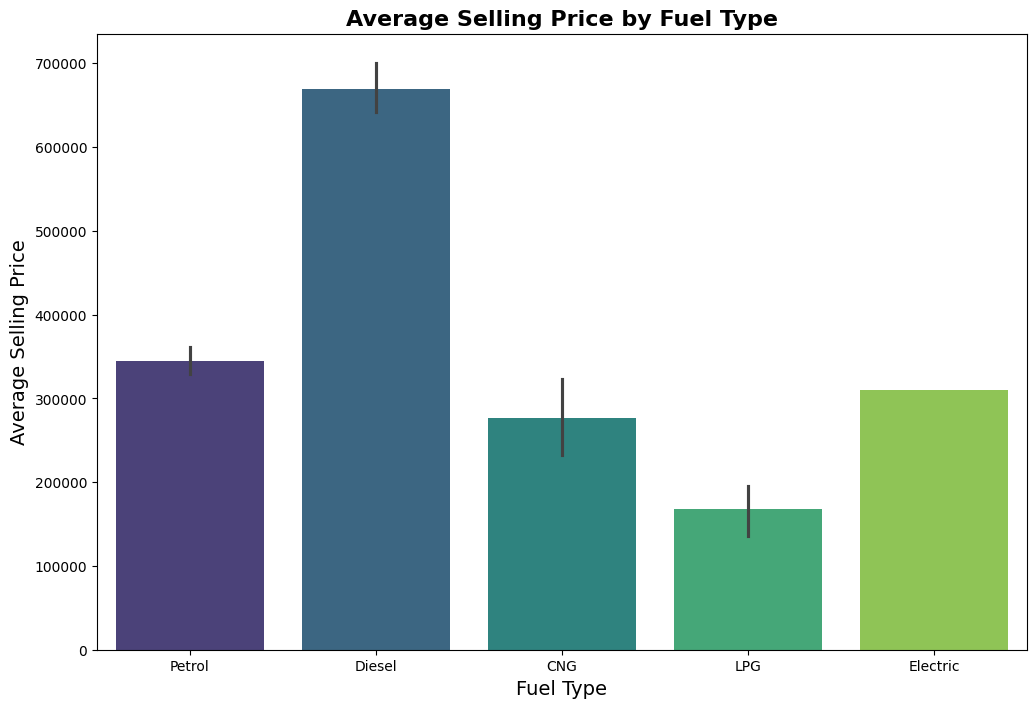

In [100]:
plt.figure(figsize=(12, 8))
sns.barplot(x='fuel', y='selling_price', data=df, palette="viridis")  # 'viridis' color palette
plt.title("Average Selling Price by Fuel Type", fontsize=16, fontweight='bold')
plt.xlabel("Fuel Type", fontsize=14)
plt.ylabel("Average Selling Price", fontsize=14)
plt.show()

Observation :- 

The bar plot shows the average selling price for each fuel type. It reveals how the price varies across different fuel types,
with some fuel types having higher average prices than others.

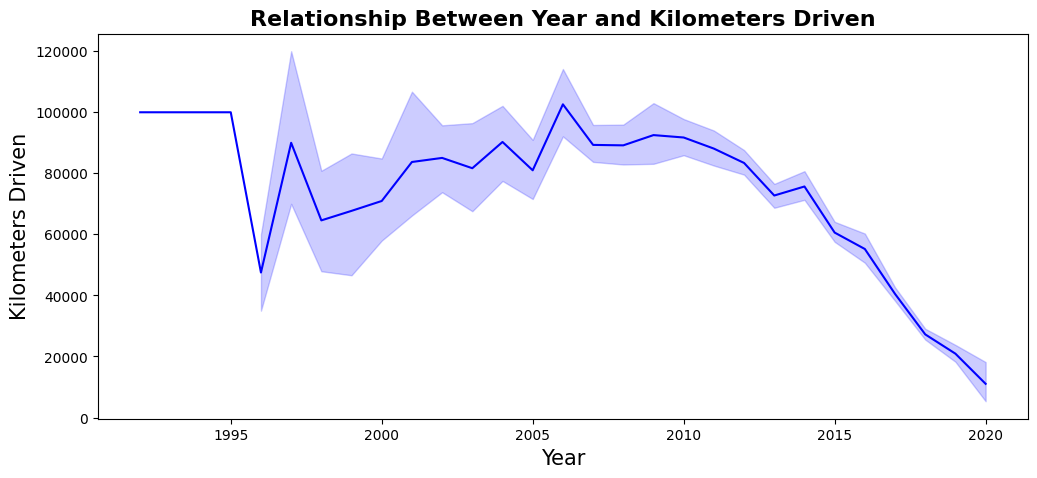

In [31]:
plt.figure(figsize=(12, 5))
sns.lineplot(x='year', y='km_driven', data=df, color='blue') 
plt.title("Relationship Between Year and Kilometers Driven", fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Kilometers Driven', fontsize=15)
plt.show()

Observation :- 

The line plot shows the relationship between the year of the vehicle and the kilometers driven. It indicates how the average kilometers driven changes over the years, 
with some years showing a higher or lower distance driven on average.

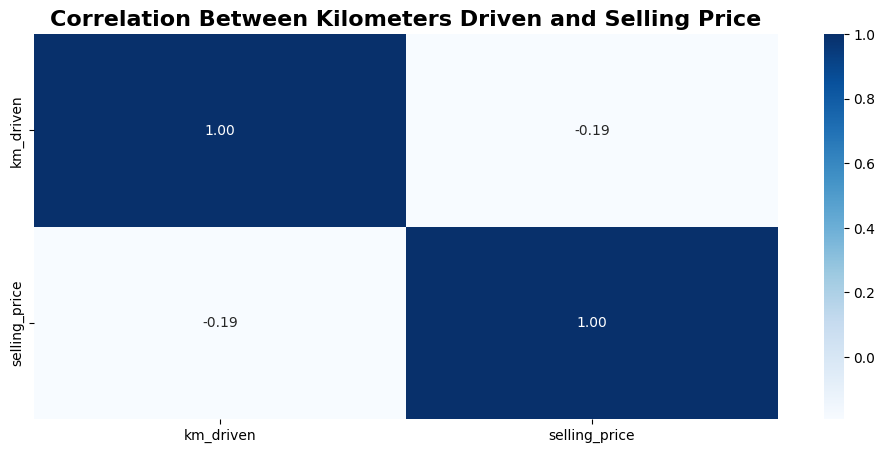

In [44]:
correlation_matrix = df[['km_driven', 'selling_price']].corr()

plt.figure(figsize=(12, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Between Kilometers Driven and Selling Price", fontsize=16, fontweight='bold')
plt.show()


Observation :- 

The heatmap shows the correlation between kilometers driven and selling price. 
The close-to-zero correlation indicates that there is little to no relationship between the number of kilometers driven and the selling price of vehicles in this dataset.



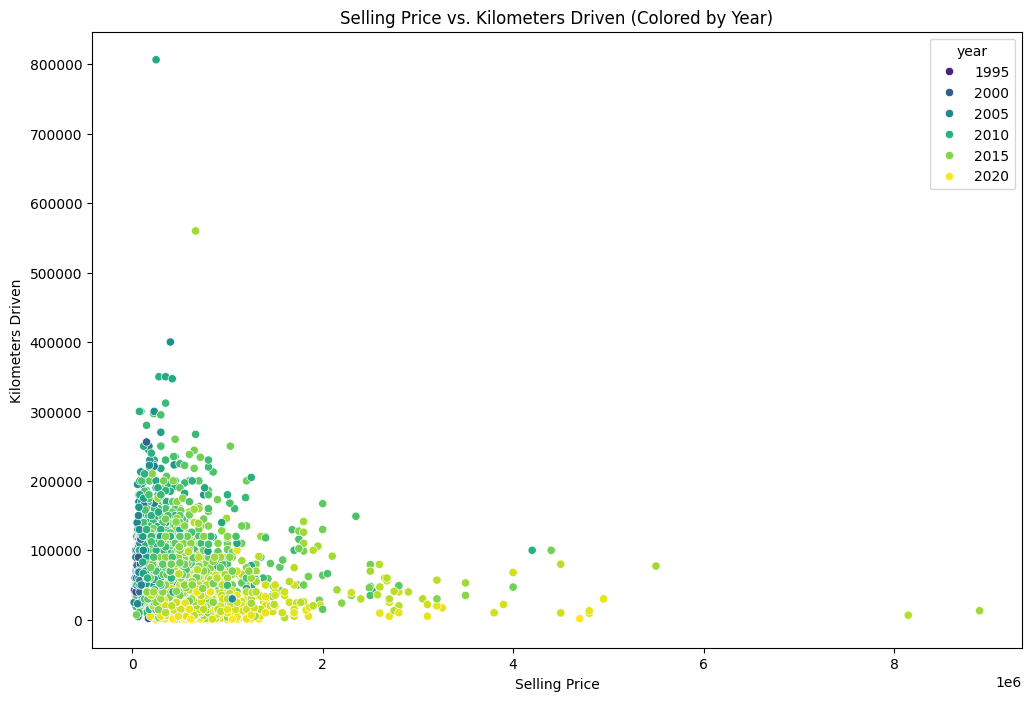

In [10]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='selling_price', y='km_driven', hue='year', data=df, palette="viridis")
plt.title("Selling Price vs. Kilometers Driven (Colored by Year)")
plt.xlabel("Selling Price")
plt.ylabel("Kilometers Driven")
plt.show()

Observation :-

The scatter plot shows the relationship between selling price and kilometers driven, with different colors representing different years.
It helps visualize any patterns or trends, such as whether newer vehicles tend to have higher selling prices regardless of the kilometers driven.

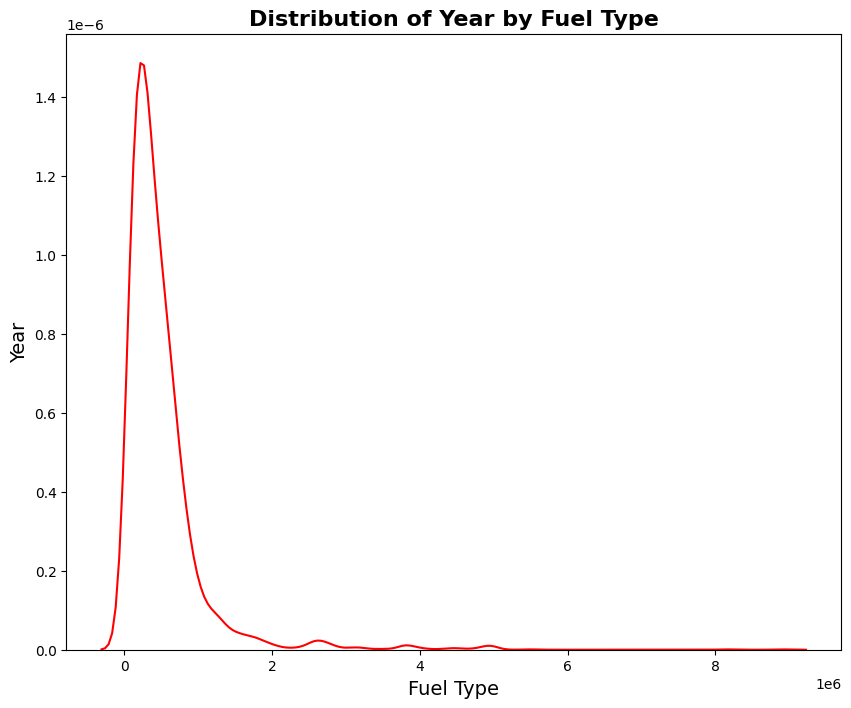

In [28]:
plt.figure(figsize=(10, 8))
sns.kdeplot(x='selling_price', data=df, color='red') 
plt.title("Distribution of Year by Fuel Type", fontsize=16, fontweight='bold')
plt.xlabel("Fuel Type", fontsize=14)
plt.ylabel("Year", fontsize=14)
plt.show() 

Observation :- 

The plot seems to have an incorrect title, as it shows the distribution of selling prices, not the relationship between fuel type and year. 
It shows how selling prices are distributed, with most prices concentrated in a specific range and a gradual decrease as prices increase.

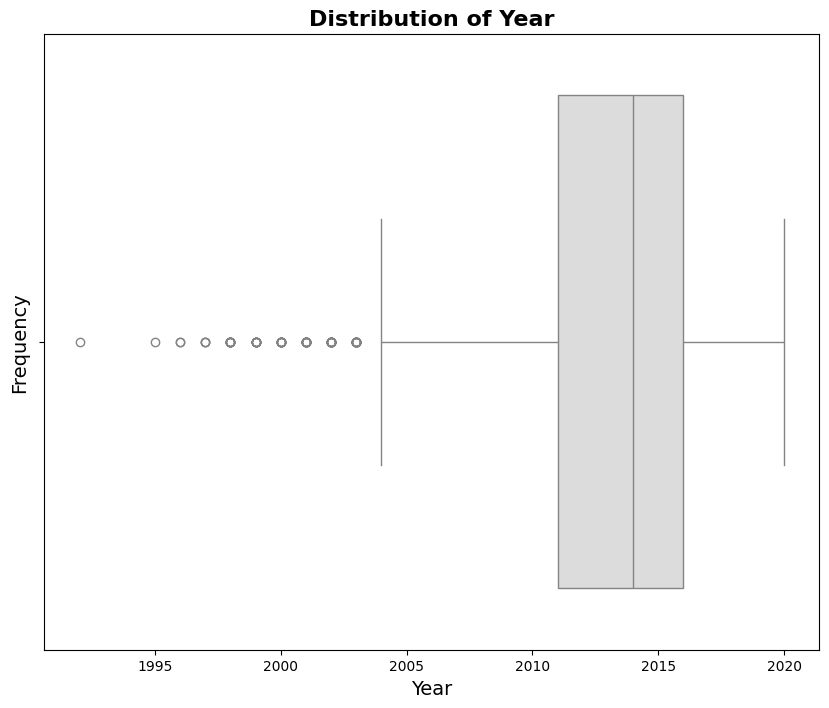

In [45]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='year', data=df, palette="coolwarm")  # Use a beautiful color palette
plt.title("Distribution of Year", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()

Observation :- 

The box plot shows the distribution of vehicles by year. 
It indicates the spread of vehicle years, with some years having more frequent occurrences than others, and highlights any potential outliers.

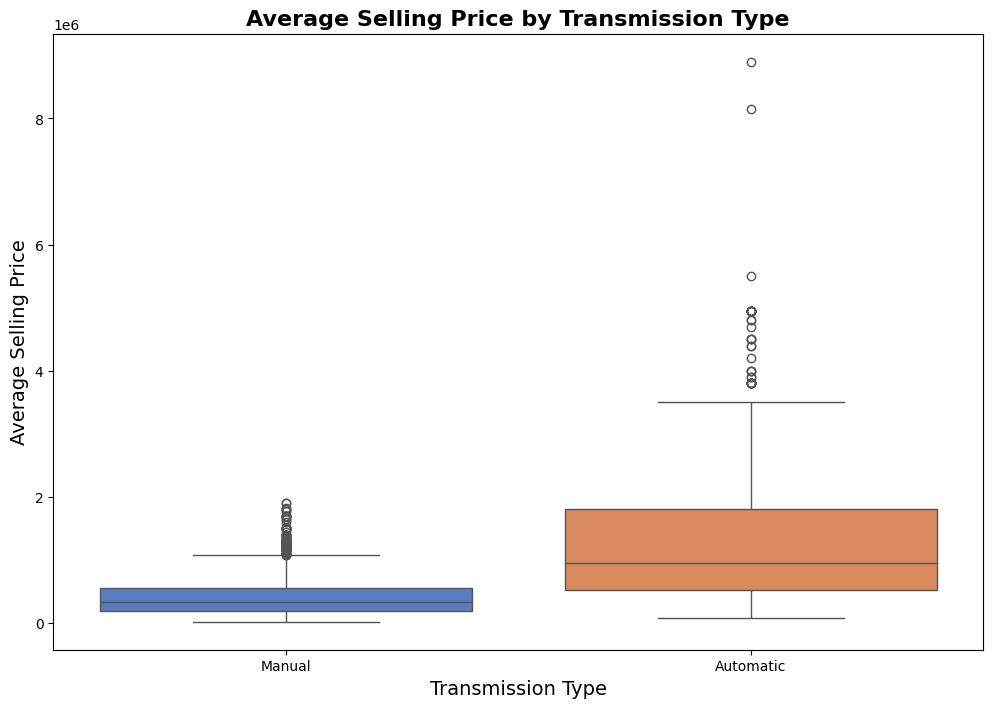

In [104]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='transmission', y='selling_price', data=df, palette="muted")
plt.title("Average Selling Price by Transmission Type", fontsize=16, fontweight='bold')
plt.xlabel("Transmission Type", fontsize=14)
plt.ylabel("Average Selling Price", fontsize=14)
plt.show()

Observation:- 

The box plot shows the distribution of average selling prices based on transmission type. 
It highlights the range of prices, with some transmission types having higher selling prices and others showing more variation in price.

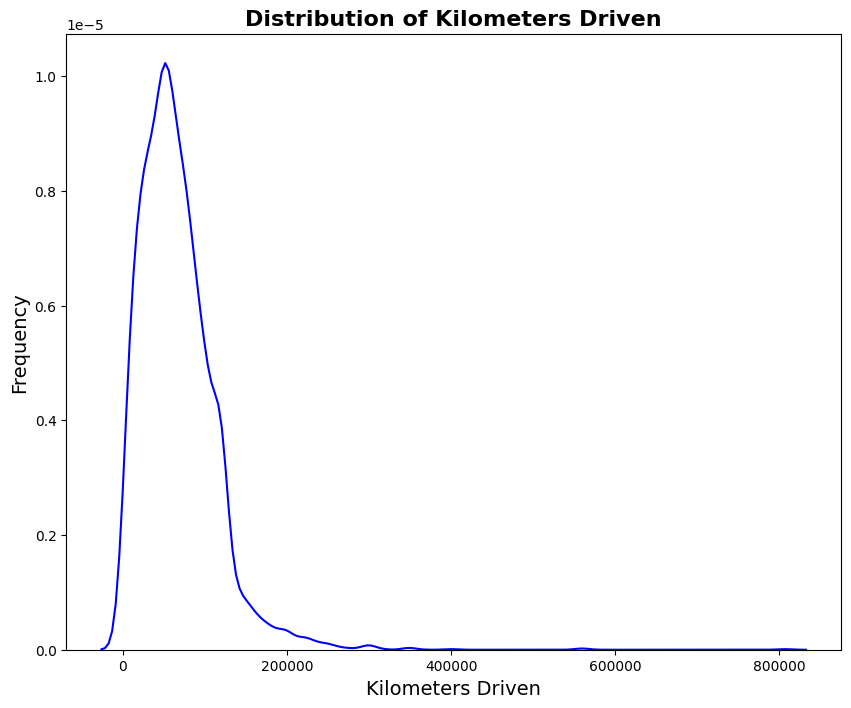

In [103]:
plt.figure(figsize=(10, 8))
sns.kdeplot(x='km_driven', data=df, color='blue') 
plt.title("Distribution of Kilometers Driven", fontsize=16, fontweight='bold')
plt.xlabel("Kilometers Driven", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()

Observation :- 

The plot shows the distribution of kilometers driven across the dataset. 
Most vehicles have a lower number of kilometers driven, with the frequency decreasing as the number of kilometers increases.

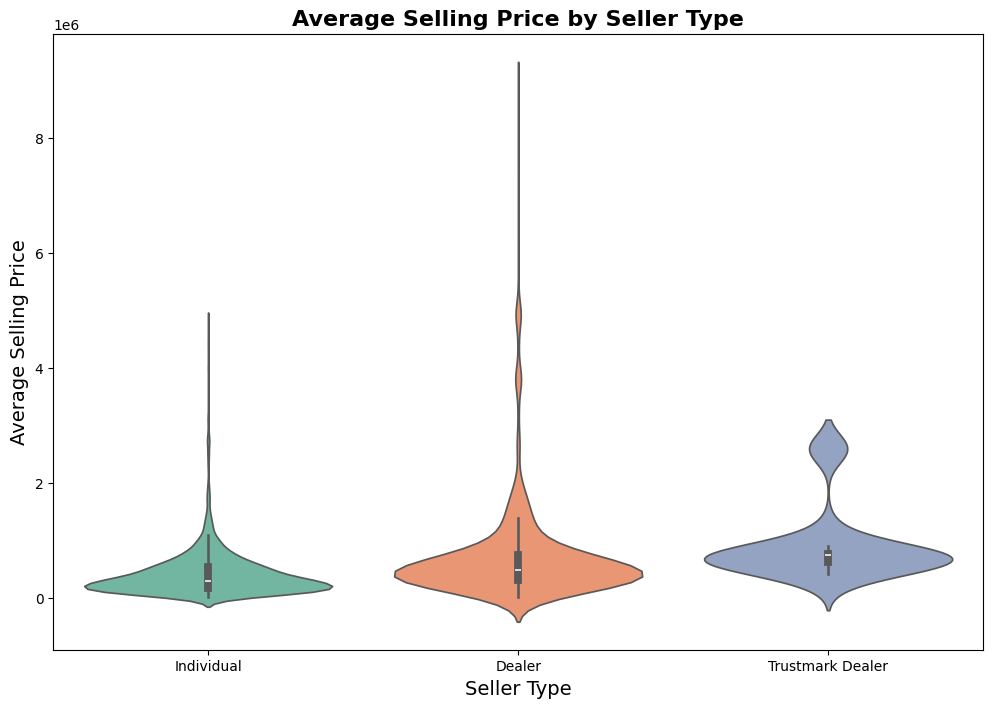

In [14]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='seller_type', y='selling_price', data=df, palette="Set2")
plt.title("Average Selling Price by Seller Type", fontsize=16, fontweight='bold')
plt.xlabel("Seller Type", fontsize=14)
plt.ylabel("Average Selling Price", fontsize=14)
plt.show()

Observation :-


The violin plot shows the distribution of average selling prices for different seller types. It helps to compare the price ranges and central tendency for each seller type, with some seller types having a wider spread of prices than others.

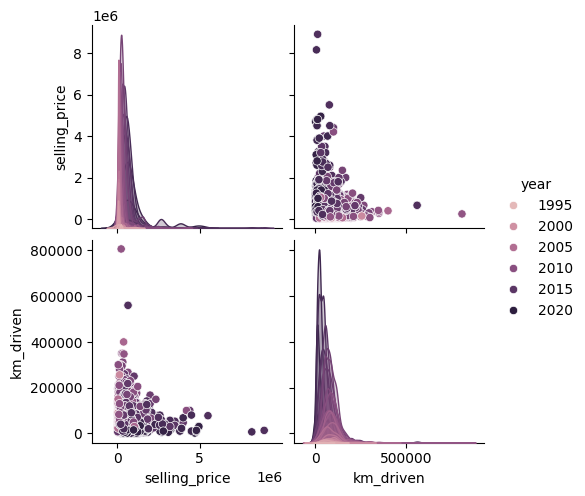

In [102]:
sns.pairplot(df, hue='year')
plt.show()

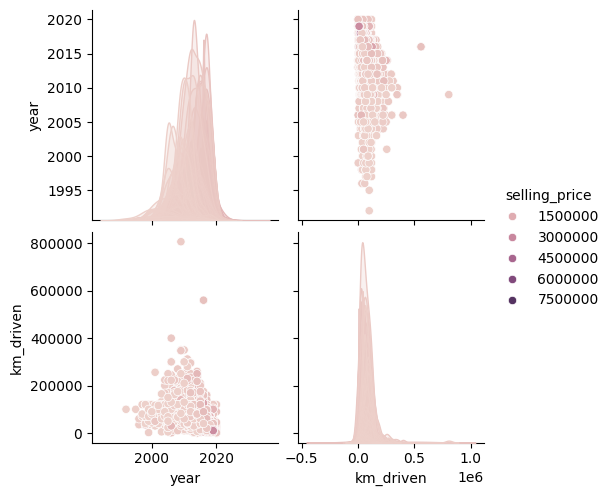

In [46]:
sns.pairplot(df, hue='selling_price')
plt.show()

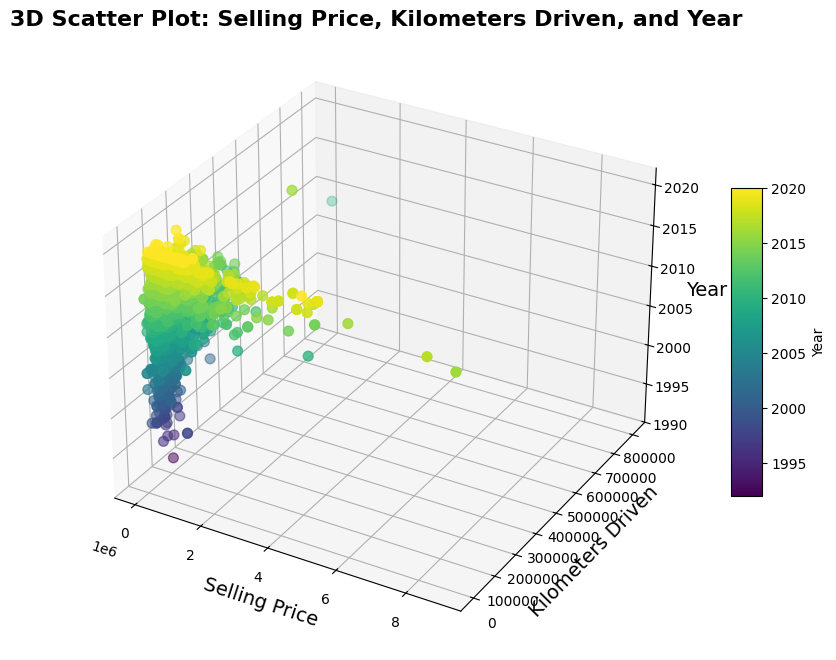

In [58]:
# Create a figure and a 3D axis
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
# Scatter plot
scatter = ax.scatter( df['selling_price'],  df['km_driven'],  df['year'],  c=df['year'],  cmap='viridis',  s=50 ) # Bubble size

# Adding labels and title
ax.set_title("3D Scatter Plot: Selling Price, Kilometers Driven, and Year", fontsize=16, fontweight='bold')
ax.set_xlabel("Selling Price", fontsize=14)
ax.set_ylabel("Kilometers Driven", fontsize=14)
ax.set_zlabel("Year", fontsize=14)

# Add a color bar
cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=10)
cbar.set_label('Year')

plt.show()


Observation :- 

 Selling Price vs. Kilometers Driven vs. Year: The plot shows how the selling price varies with kilometers driven and year.
 
 Year Trend: Vehicles from more recent years (higher values in the "year" axis) generally have higher selling prices.
 
 Kilometers Driven: Cars with higher kilometers driven tend to have lower selling prices.
 
 Cluster Patterns: The data points may form clusters, reflecting distinct categories or patterns (e.g., new vs. older vehicles).

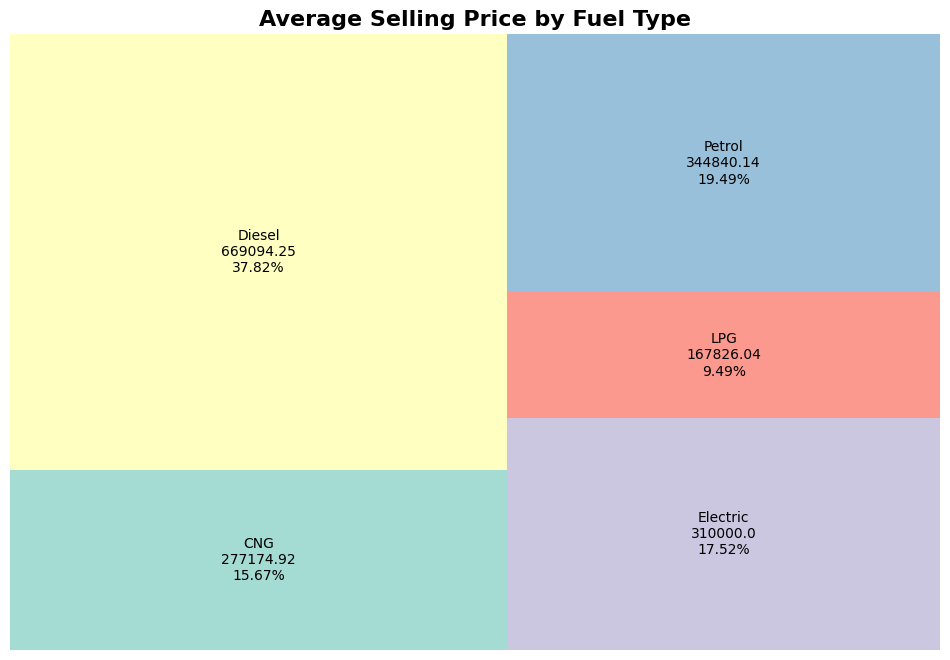

In [66]:
# Aggregating data to calculate average selling price by fuel type
df_grouped = df.groupby('fuel').agg({'selling_price': 'mean'}).reset_index()

# Calculate total selling price for percentage calculation
total_selling_price = df_grouped['selling_price'].sum()

# Calculate percentage for each fuel type
df_grouped['percentage'] = (df_grouped['selling_price'] / total_selling_price) * 100

# Create labels with the percentage
df_grouped['label'] = df_grouped['fuel'] + "\n" + \
                      df_grouped['selling_price'].round(2).astype(str) + "\n" + \
                      df_grouped['percentage'].round(2).astype(str) + "%"

# Creating the treemap
plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=df_grouped['selling_price'],  # Sizes of rectangles based on selling price
    label=df_grouped['label'],          # Labels with fuel type, selling price, and percentage
    color=plt.cm.Set3(range(len(df_grouped))),  # Assign unique colors for each fuel type
    alpha=0.8                          # Transparency
)
plt.title("Average Selling Price by Fuel Type", fontsize=16, fontweight='bold')
plt.axis('off')  # Remove axes for a clean treemap
plt.show()


Observation :- 

The treemap displays the average selling price for each fuel type, 
with the size of each rectangle representing the price. It also shows the percentage contribution of each fuel type to the total selling price,
providing a clear visual comparison of their relative values.


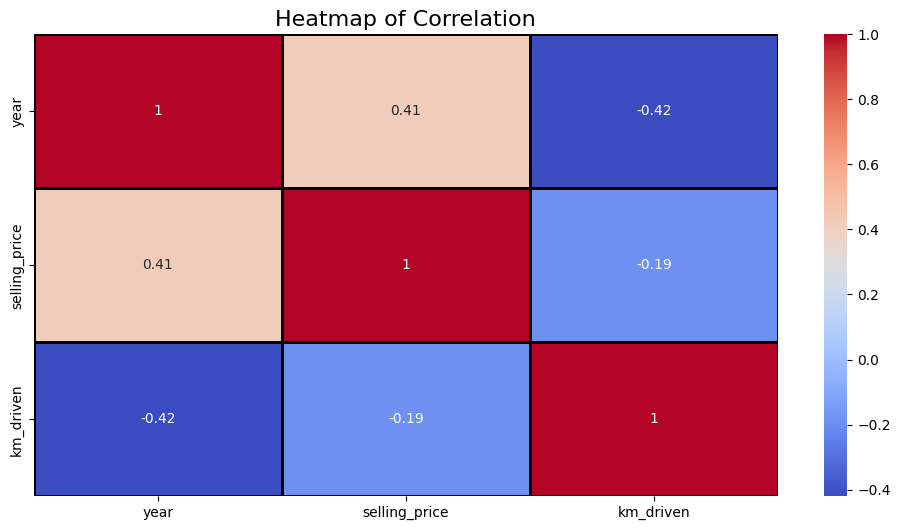

In [75]:
# Filter only numeric columns
numeric_data = df.select_dtypes(include=['number'])

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_data.corr(), annot=True, linewidths=2, linecolor='k', cmap='coolwarm')  # Change 'coolwarm' to any desired colormap
plt.title('Heatmap of Correlation', fontsize=16)
plt.show()

Observation :- 

The heatmap shows the correlation between different numeric variables in the dataset. 
It helps identify which variables are positively or negatively related, with darker or lighter colors indicating stronger or weaker correlations.

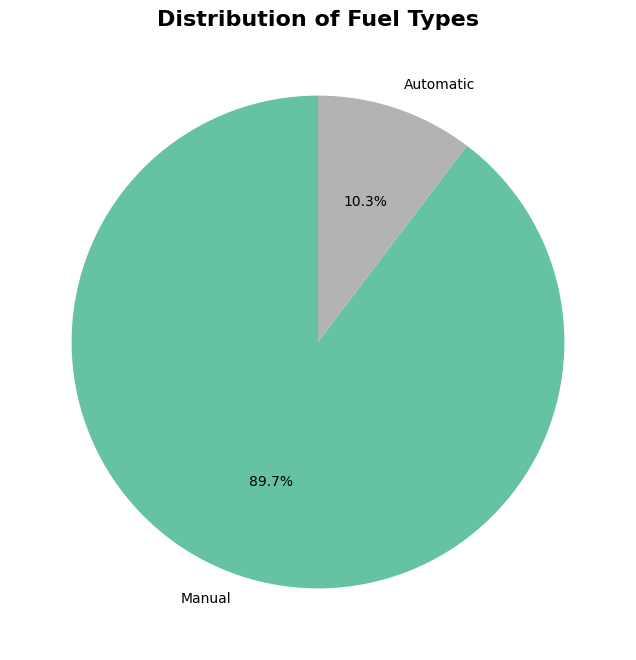

In [95]:
fuel_counts = df['transmission'].value_counts()

# Create the pie chart
plt.figure(figsize=(12, 8))
fuel_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set2', legend=False)
plt.title("Distribution of Fuel Types", fontsize=16, fontweight='bold')
plt.ylabel('')  # Hides the y-label
plt.show()

Observation :- 

The pie chart shows the distribution of vehicles based on their transmission type. 
It highlights the percentage of vehicles with different transmission types, making it easy to see which type is more common.

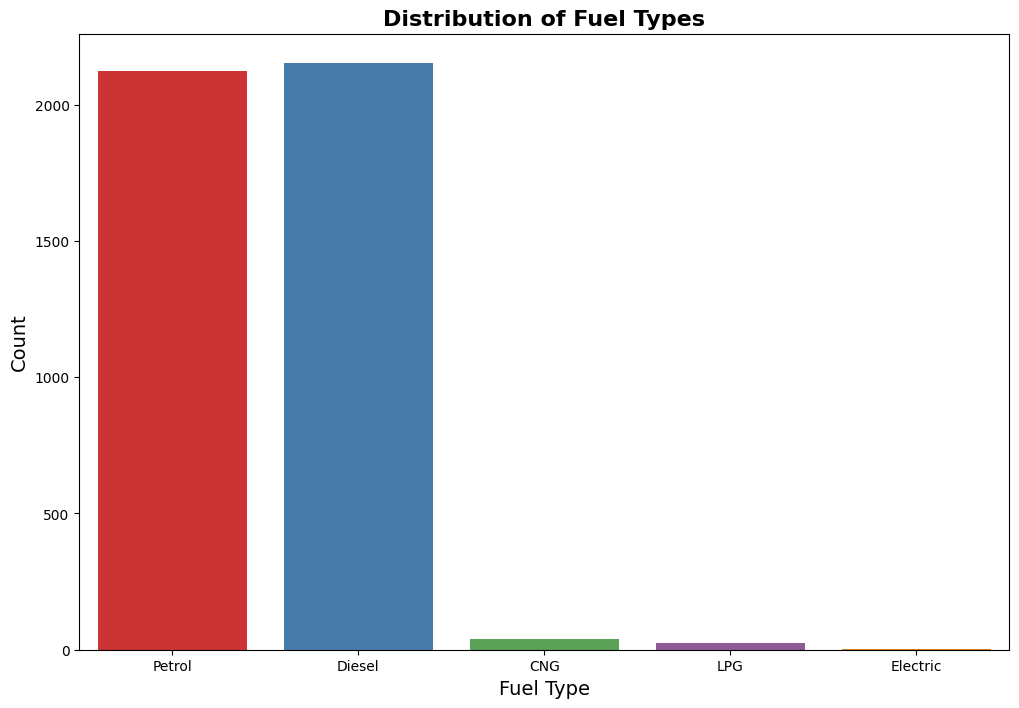

In [87]:
# Create the bar chart using countplot
plt.figure(figsize=(12, 8))
sns.countplot(x='fuel', data=df, palette='Set1')
plt.title("Distribution of Fuel Types", fontsize=16, fontweight='bold')
plt.xlabel('Fuel Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

Observation :- 


The bar chart shows the number of vehicles for each fuel type in the dataset.
It reveals how many vehicles use different fuel types, with the most and least common fuel types easily identifiable.

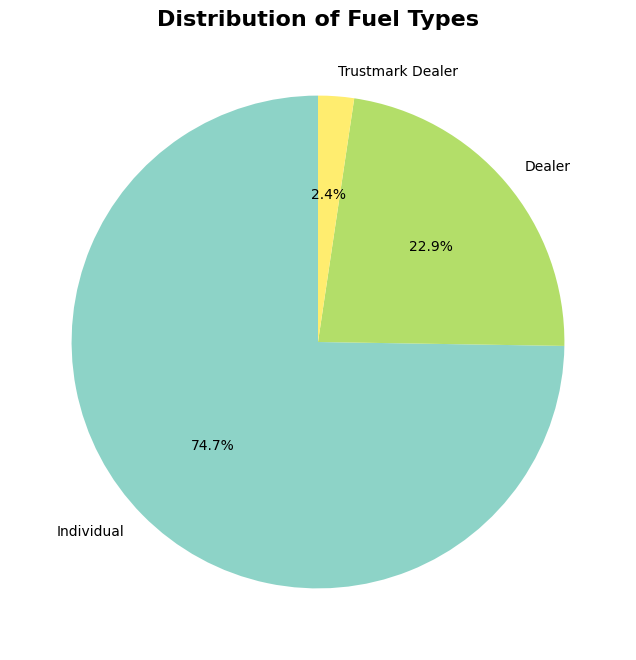

In [96]:
fuel_counts = df['seller_type'].value_counts()

# Create the pie chart
plt.figure(figsize=(12, 8))
fuel_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3', legend=False)
plt.title("Distribution of Fuel Types", fontsize=16, fontweight='bold')
plt.ylabel('')  # Hides the y-label
plt.show()

Observation :- 

The pie chart shows the distribution of different seller types in the dataset.
It helps visualize the proportion of each seller type, with the percentage of each category clearly displayed.

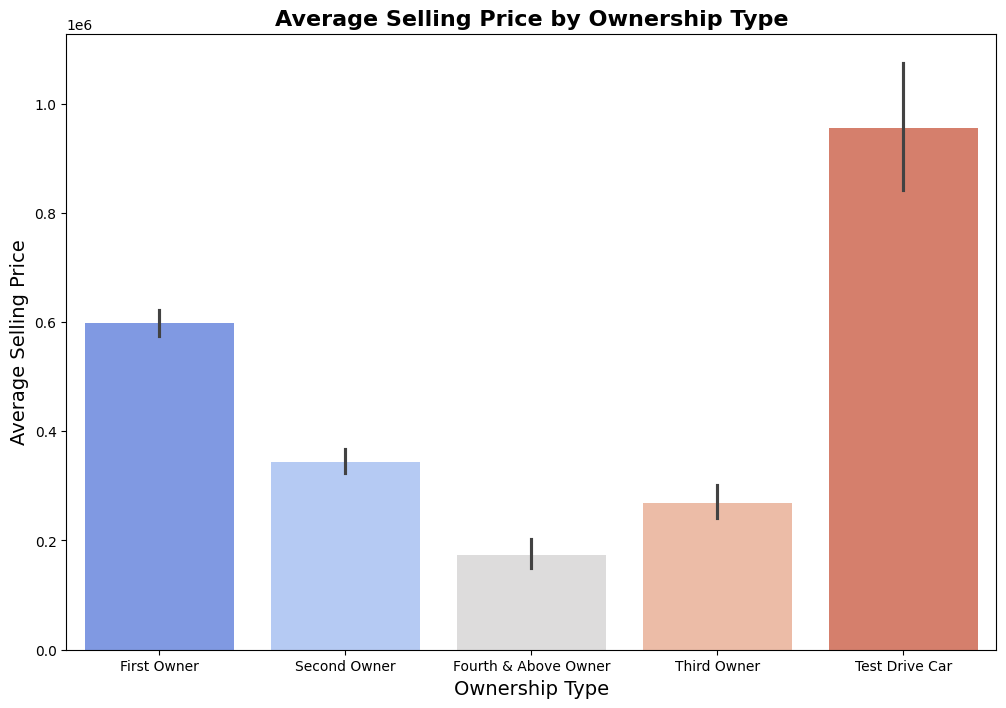

In [97]:
plt.figure(figsize=(12, 8))
sns.barplot(x='owner', y='selling_price', data=df, palette="coolwarm")
plt.title("Average Selling Price by Ownership Type", fontsize=16, fontweight='bold')
plt.xlabel("Ownership Type", fontsize=14)
plt.ylabel("Average Selling Price", fontsize=14)
plt.show()

Observation :- 

The bar plot shows the average selling price of vehicles based on their ownership type.
It helps us see how the price varies for different ownership categories,with some ownership types having higher prices than others.

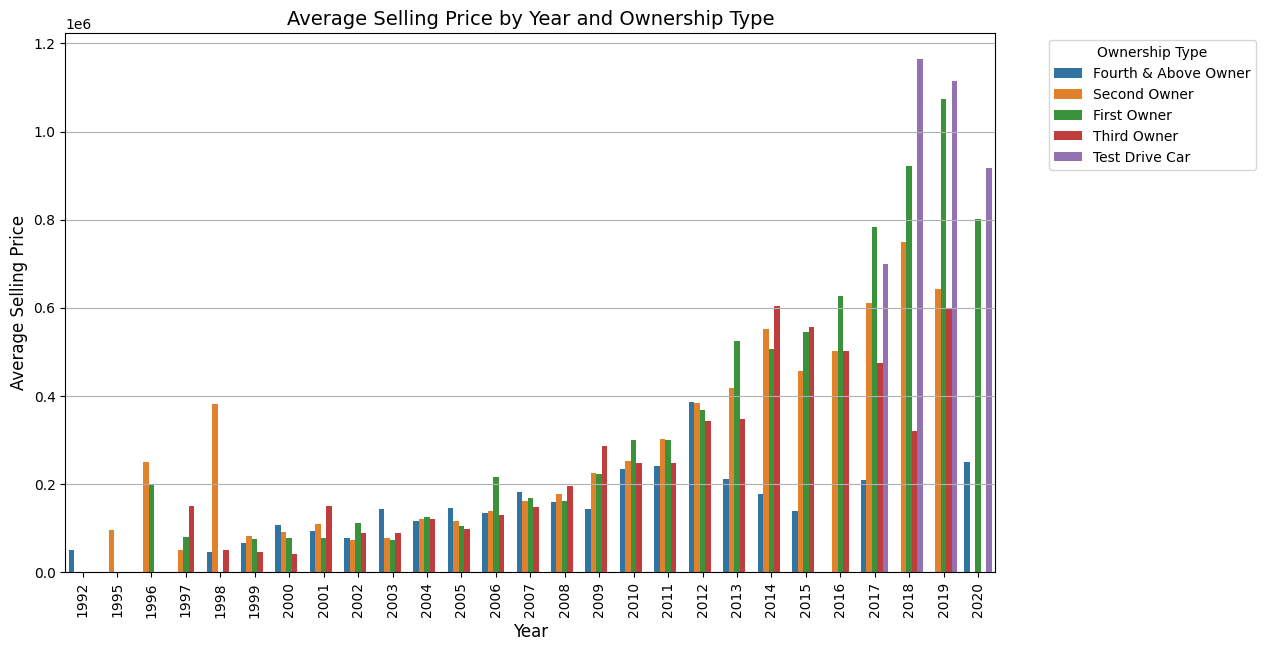

In [109]:
# Group by 'year' and 'owner' to calculate the average selling price per year and ownership type
team_wins_by_season = df.groupby(['year', 'owner']).agg({'selling_price': 'mean'}).reset_index()

plt.figure(figsize=(12, 7))
sns.barplot(x='year', y='selling_price', hue='owner', data=team_wins_by_season)
plt.title('Average Selling Price by Year and Ownership Type', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Selling Price', fontsize=12)
plt.grid(axis='y')
plt.xticks(rotation=90)

plt.legend(title='Ownership Type', bbox_to_anchor=(1.05, 1))
plt.show()


Observation :- 

The bar plot shows the average selling price of vehicles by year, with different colors representing various ownership types. 
It reveals how selling prices fluctuate across years and how ownership type influences the price.